# Plotting heuristics of Machine Learning pipeline

**Author**: Miguel Xochicale [@mxochicale](https://github.com/mxochicale)     
**Contributors**: Nhat Phung Tran Huy [@huynhatd13](https://github.com/huynhatd13); Hamideh Kerdegari [@hamidehkerdegari](https://github.com/hamidehkerdegari);  Alberto Gomez [@gomezalberto](https://github.com/)  


## History
* June2022: Adding multiple plots  
* Aug2022: Ploting multiple trians

## Summary
This notebook presents a learning pipeline to classify 4 chamber view from echocardiography datasets.

### How to run the notebook

1. Go to echocardiography repository path: `$HOME/repositories/echocardiography/`
2. Open echocardiography repo in pycharm and in the terminal type:
    ```
    git checkout master # or the branch
    git pull # to bring a local branch up-to-date with its remote version
    ```
3. Launch Notebook server  
    Go to you repository path: `cd $HOME/repositories/echocardiography/scripts/dataloaders` and type in the pycharm terminal:
    ```
    conda activate rt-ai-echo-VE 
    jupyter notebook
    ```
    which will open your web-browser.
    
    
### References
* "Proposed Regulatory Framework for Modifications to Artificial Intelligence/Machine Learning (AI/ML)-Based Software as a Medical Device (SaMD) - Discussion Paper and Request for Feedback". https://www.fda.gov/media/122535/download 




# Jupyter Notebook

## 1. Setting imports and datasets paths

In [9]:
import os
import fnmatch
import sys
import argparse
import yaml
from pathlib import Path
import json    

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.animation as animation

import numpy as np
import pandas as pd
import seaborn as sns

from typing import Dict, List, Tuple

from source.helpers.learning_pipeline import json2DataFrame, \
                                            jsonPARAMS2DataFrame


HOME_PATH = os.path.expanduser(f'~')
USERNAME = os.path.split(HOME_PATH)[1]

REPOSITORY_PATH='repositories/echocardiography'
FULL_REPO_PATH = HOME_PATH+'/'+REPOSITORY_PATH

#### Setting RESULTS_PATH and TRAINING_CURVES_PATH
# RESULTS_PATH='scripts/learning-pipeline/results/1st-tests-23-june-2022'
#RESULTS_PATH='scripts/learning-pipeline/results/3rd-tests-30-june-2022/experiments-01-02-03-04'
#RESULTS_PATH='scripts/learning-pipeline/results/3rd-tests-30-june-2022/experiments-04-05-06-07'
#RESULTS_PATH='scripts/learning-pipeline/results/3rd-tests-30-june-2022/experiments-09-10-11-12'


# ####################################
# ##MobileNetV1() with 3,208,450 params
# # NUMBER_OF_SUBJECTS='05-subjects'
# NUMBER_OF_SUBJECTS='31-subjects'
# RESULTS_PATH='scripts/learning-pipeline/results/mobileNetV1-8-aug-2022/'+NUMBER_OF_SUBJECTS

#######################################
##MobileNet2() with 2,225,858 params
# NUMBER_OF_SUBJECTS='05-subjects'
# # NUMBER_OF_SUBJECTS='31-subjects'
# RESULTS_PATH='scripts/learning-pipeline/results/5th-tests-04-augs-2022/'+NUMBER_OF_SUBJECTS


# ####################################
# ##SqueezeNet_source0() with 733,580 params
# # NUMBER_OF_SUBJECTS='05-subjects'
# NUMBER_OF_SUBJECTS='31-subjects'
# RESULTS_PATH='scripts/learning-pipeline/results/6th-tests-05-aug-2022/'+NUMBER_OF_SUBJECTS

####################################
##SqueezeNet_source0() with 733,580 params

# NUMBER_OF_SUBJECTS='05-subjects'
# # BATCHES='-batches_05'
# # BATCHES='-batches_10'
# BATCHES='-batches_30'

# NUMBER_OF_SUBJECTS='31-subjects'
# # BATCHES='-batches_05'
# # BATCHES='-batches_10'
# BATCHES='-batches_30'

# RESULTS_PATH='scripts/learning-pipeline/results/aug-09-2022_SqueezeNet_hyperparameters/batches/'+ \
#         NUMBER_OF_SUBJECTS+BATCHES


NUMBER_OF_SUBJECTS='05-subjects'
BATCHES='-batches_30'
LR='0_01'
# LR='0_0001'
# LR='0_00001'
RESULTS_PATH='scripts/learning-pipeline/results/aug-09-2022_SqueezeNet_hyperparameters/learning_rate/'+ \
        NUMBER_OF_SUBJECTS+BATCHES+'/lr_'+LR



TRAINING_CURVES_PATH = os.path.join(FULL_REPO_PATH, RESULTS_PATH)
## Printing Versions and paths
print(f'Pandas Version: {pd.__version__}')
print(f'seaborn Version: {sns.__version__}')
print(f'TRAINING_CURVES_PATH: {TRAINING_CURVES_PATH}' )

Pandas Version: 1.4.2
seaborn Version: 0.11.1
TRAINING_CURVES_PATH: /home/mx19/repositories/echocardiography/scripts/learning-pipeline/results/aug-09-2022_SqueezeNet_hyperparameters/learning_rate/05-subjects-batches_30/lr_0_01


## 2. Reading dictionaries and filtering files

In [10]:
print(f'TRAINING_CURVES_PATH: {TRAINING_CURVES_PATH}' )
os.chdir(TRAINING_CURVES_PATH)

pattern = 'TEMP_DICT_TRAINING_CURVES_FOR_____LOSS_ACC*.json'
json_files=fnmatch.filter(  sorted(os.listdir(TRAINING_CURVES_PATH))  , pattern)
print(f'-------------------')
print(f'-----Stats')
for i in range(0,len(json_files)):
    print(i, json_files[i])
    
    
pattern_params = 'TEMP_DICT_TRAINING_CURVES_FOR____TRAINING_PARAMETERS*.json'
json_files_params=fnmatch.filter(  sorted(os.listdir(TRAINING_CURVES_PATH))  , pattern_params)    
print(f'-------------------')
print(f'----Parameters')
for i in range(0,len(json_files_params)):
    print(i, json_files_params[i])    



TRAINING_CURVES_PATH: /home/mx19/repositories/echocardiography/scripts/learning-pipeline/results/aug-09-2022_SqueezeNet_hyperparameters/learning_rate/05-subjects-batches_30/lr_0_01
-------------------
-----Stats
0 TEMP_DICT_TRAINING_CURVES_FOR_____LOSS_ACC_TRAINset_clips_42TESTset_clips_6VALset_clips18___EPOCHS_500_BATCH_SIZE_OF_CLIPS_30_NUMBER_OF_FRAMES_PER_SEGMENT_IN_A_CLIP_1_LEARNING_RATE_0_0100000000_TRAINVERSION_train01.json
1 TEMP_DICT_TRAINING_CURVES_FOR_____LOSS_ACC_TRAINset_clips_44TESTset_clips_10VALset_clips12___EPOCHS_500_BATCH_SIZE_OF_CLIPS_30_NUMBER_OF_FRAMES_PER_SEGMENT_IN_A_CLIP_1_LEARNING_RATE_0_0100000000_TRAINVERSION_train00.json
2 TEMP_DICT_TRAINING_CURVES_FOR_____LOSS_ACC_TRAINset_clips_52TESTset_clips_4VALset_clips10___EPOCHS_500_BATCH_SIZE_OF_CLIPS_30_NUMBER_OF_FRAMES_PER_SEGMENT_IN_A_CLIP_1_LEARNING_RATE_0_0100000000_TRAINVERSION_train02.json
-------------------
----Parameters
0 TEMP_DICT_TRAINING_CURVES_FOR____TRAINING_PARAMETERSTRAINset_clips_42TESTset_clips_6

## 2. Plotting training curves

     epochs      LR N_BatchClips FRXClips datatype  Acc [%] RUN_NN
0         0  lr0.01         bc30        1    train     55.5  run01
1         1  lr0.01         bc30        1    train     51.5  run01
2         2  lr0.01         bc30        1    train     44.5  run01
3         3  lr0.01         bc30        1    train     38.0  run01
4         4  lr0.01         bc30        1    train     50.0  run01
..      ...     ...          ...      ...      ...      ...    ...
995     495  lr0.01         bc30        1     test     50.0  run02
996     496  lr0.01         bc30        1     test     50.0  run02
997     497  lr0.01         bc30        1     test     75.0  run02
998     498  lr0.01         bc30        1     test     50.0  run02
999     499  lr0.01         bc30        1     test     75.0  run02

[3000 rows x 7 columns]


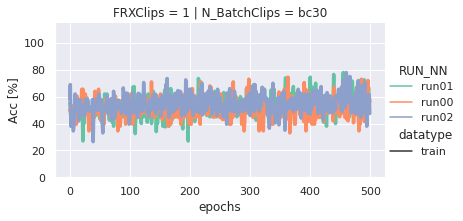

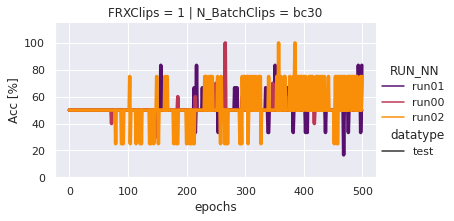

     epochs      LR N_BatchClips FRXClips datatype      Loss RUN_NN
0         0  lr0.01         bc20        1    train  1.333712  run01
1         1  lr0.01         bc20        1    train  0.937678  run01
2         2  lr0.01         bc20        1    train  1.552862  run01
3         3  lr0.01         bc20        1    train  1.568821  run01
4         4  lr0.01         bc20        1    train  1.760031  run01
..      ...     ...          ...      ...      ...       ...    ...
995     495  lr0.01         bc20        1     test  0.932750  run02
996     496  lr0.01         bc20        1     test  1.697605  run02
997     497  lr0.01         bc20        1     test  2.860005  run02
998     498  lr0.01         bc20        1     test  1.750561  run02
999     499  lr0.01         bc20        1     test  0.967108  run02

[3000 rows x 7 columns]


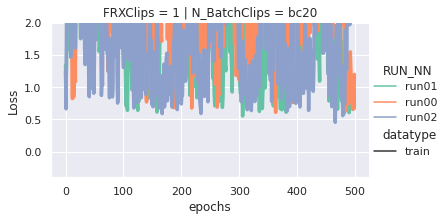

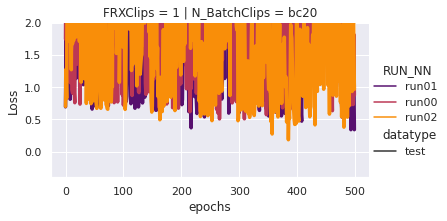

In [11]:
TYPE_str = 'ACC'    
FRAMES_PER_SEGMENT_IN_A_CLIP = 1
BatchClips=30
LR=0.01
STR_VARIABLE_NAME = 'Acc [%]'
# RUN_VERSION=['run02', 'run00', 'run01']
# RUN_VERSION=['run02', 'run01', 'run00']
RUN_VERSION=['run01', 'run00', 'run02']
# RUN_VERSION=['run00', 'run02', 'run01']
# RUN_VERSION=['run00', 'run01', 'run02']


acc0_all_=json2DataFrame(TRAINING_CURVES_PATH,str(json_files[0]), 
                    TYPE_str, FRAMES_PER_SEGMENT_IN_A_CLIP, BatchClips,LR, STR_VARIABLE_NAME, RUN_VERSION[0])
acc1_all_=json2DataFrame(TRAINING_CURVES_PATH,str(json_files[1]), 
                    TYPE_str, FRAMES_PER_SEGMENT_IN_A_CLIP, BatchClips,LR, STR_VARIABLE_NAME, RUN_VERSION[1])
acc2_all_=json2DataFrame(TRAINING_CURVES_PATH,str(json_files[2]), 
                    TYPE_str, FRAMES_PER_SEGMENT_IN_A_CLIP, BatchClips,LR, STR_VARIABLE_NAME, RUN_VERSION[2])


acc_dfall = [acc0_all_, acc1_all_,acc2_all_]
acc_all = pd.concat(acc_dfall)
print(acc_all)


sns.set(style="darkgrid")#sns.set(style="ticks")
g0=sns.relplot(x="epochs", y=STR_VARIABLE_NAME, 
            hue="RUN_NN",
            col="N_BatchClips", 
            row="FRXClips", 
            style="datatype",
            #col_wrap=2, 
            height=3, aspect=1.75, linewidth=3.5,
            kind="line", 
            estimator=None,
            palette="Set2",#palette=palette,
            data=acc_all.query("datatype == 'train'"))#data=acc_all)
g0.set(ylim=(0, 115))

sns.set(style="darkgrid")
g1=sns.relplot(x="epochs", y=STR_VARIABLE_NAME, 
            hue="RUN_NN",
            col="N_BatchClips", 
            row="FRXClips", 
            style="datatype",
            #col_wrap=2, 
            height=3, aspect=1.75, linewidth=3.5,
            kind="line", 
            estimator=None,
            palette="inferno",#palette=palette,
            data=acc_all.query("datatype == 'test'"))#data=acc_all)
g1.set(ylim=(0, 115))

plt.show()


TYPE_str = 'LOS'    
BatchClips=20
STR_VARIABLE_NAME = 'Loss'
loss0_all_=json2DataFrame(TRAINING_CURVES_PATH,str(json_files[0]), 
                    TYPE_str, FRAMES_PER_SEGMENT_IN_A_CLIP, BatchClips,LR, STR_VARIABLE_NAME, RUN_VERSION[0])
loss1_all_=json2DataFrame(TRAINING_CURVES_PATH,str(json_files[1]), 
                    TYPE_str, FRAMES_PER_SEGMENT_IN_A_CLIP, BatchClips,LR, STR_VARIABLE_NAME, RUN_VERSION[1])
loss2_all_=json2DataFrame(TRAINING_CURVES_PATH,str(json_files[2]), 
                    TYPE_str, FRAMES_PER_SEGMENT_IN_A_CLIP, BatchClips,LR, STR_VARIABLE_NAME, RUN_VERSION[2])

loss_dfall = [loss0_all_, loss1_all_,loss2_all_]
loss_all = pd.concat(loss_dfall)
print(loss_all)


sns.set(style="darkgrid")#sns.set(style="ticks")
g2=sns.relplot(x="epochs", y=STR_VARIABLE_NAME, 
            hue="RUN_NN",
            col="N_BatchClips", 
            row="FRXClips", 
            style="datatype",
            #col_wrap=2, 
            height=3, aspect=1.75, linewidth=3.5,
            kind="line", 
            estimator=None,
            palette="Set2",#palette=palette,
            data=loss_all.query("datatype == 'train'"))#data=acc_all)
g2.set(ylim=(-0.4, 2))

sns.set(style="darkgrid")
g3=sns.relplot(x="epochs", y=STR_VARIABLE_NAME, 
            hue="RUN_NN",
            col="N_BatchClips", 
            row="FRXClips", 
            style="datatype",
            #col_wrap=2, 
            height=3, aspect=1.75, linewidth=3.5,
            kind="line", 
            estimator=None,
            palette="inferno",#palette=palette,
            data=loss_all.query("datatype == 'test'"))#data=acc_all)
g3.set(ylim=(-0.4, 2))

plt.show()
    

## 3. Plotting Paramters of Performance

elapsed_time_for_the_NOTEBOOK_in_secs [151.01488947868347, 156.0506317615509, 165.05888319015503]
elapsed_time_for_the_training_loop_in_secs [89.95624089241028, 97.52060031890869, 105.65075755119324]
Precision [0.799999999999999, 0.25, 0.777777777777777]
Recall [0.6666666666666661, 0.5, 0.6000000000000001]
F1score [0.625, 0.33333333333333304, 0.5238095238095241]
       Dataset Classification type  Classification [%] RUN_NN
0  05-subjects           Precision            0.800000  run01
1  05-subjects           Precision            0.250000  run00
2  05-subjects           Precision            0.777778  run02
0  05-subjects              Recall            0.666667  run01
1  05-subjects              Recall            0.500000  run00
2  05-subjects              Recall            0.600000  run02
0  05-subjects             F1score            0.625000  run01
1  05-subjects             F1score            0.333333  run00
2  05-subjects             F1score            0.523810  run02


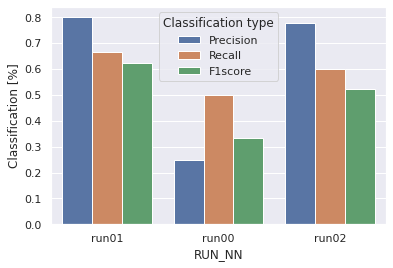

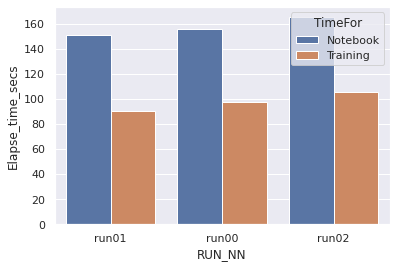

In [12]:
elapsed_time_for_the_NOTEBOOK_in_secs=[]
elapsed_time_for_the_training_loop_in_secs=[]
Precision=[]
Recall=[]
F1score=[]


for i in range(0, len(json_files_params)):
    params=jsonPARAMS2DataFrame(TRAINING_CURVES_PATH,str(json_files_params[i]))
    elapsed_time_for_the_NOTEBOOK_in_secs.append(params[0])
    elapsed_time_for_the_training_loop_in_secs.append(params[1])
    Precision.append(params[11]['Precision']['weighted avg/Total'])
    Recall.append(params[11]['Recall']['weighted avg/Total'])
    F1score.append(params[11]['F1-score']['weighted avg/Total'])
    
print(f'elapsed_time_for_the_NOTEBOOK_in_secs {elapsed_time_for_the_NOTEBOOK_in_secs}')    
print(f'elapsed_time_for_the_training_loop_in_secs {elapsed_time_for_the_training_loop_in_secs}')
print(f'Precision {Precision}')   
print(f'Recall {Recall}')   
print(f'F1score {F1score}')


##
Y_AXIS_LABEL='Classification [%]'
precision_report_df = pd.DataFrame(Precision).reset_index(drop=True)
precision_report_df.rename(columns={0:Y_AXIS_LABEL}, inplace=True)
precision_report_df.insert(0, 'Classification type', 'Precision', True)
precision_report_df['RUN_NN'] = RUN_VERSION
precision_report_df.insert(0, 'Dataset', NUMBER_OF_SUBJECTS, True)

recall_report_df = pd.DataFrame(Recall).reset_index(drop=True)
recall_report_df.rename(columns={0:Y_AXIS_LABEL}, inplace=True)
recall_report_df.insert(0, 'Classification type', 'Recall', True)
recall_report_df['RUN_NN'] = RUN_VERSION
recall_report_df.insert(0, 'Dataset', NUMBER_OF_SUBJECTS, True)


f1score_report_df = pd.DataFrame(F1score).reset_index(drop=True)
f1score_report_df.rename(columns={0:Y_AXIS_LABEL}, inplace=True)
f1score_report_df.insert(0, 'Classification type', 'F1score', True)
f1score_report_df['RUN_NN'] = RUN_VERSION
f1score_report_df.insert(0, 'Dataset', NUMBER_OF_SUBJECTS, True)

classification_df = pd.concat([precision_report_df, recall_report_df, f1score_report_df])
print(classification_df)
sns.barplot(x="RUN_NN", y=Y_AXIS_LABEL, hue="Classification type", 
                 data=classification_df)
plt.show()

Y_AXIS_LABEL='Elapse_time_secs'
timenotebook_df = pd.DataFrame(elapsed_time_for_the_NOTEBOOK_in_secs).reset_index(drop=True)
timenotebook_df.rename(columns={0:Y_AXIS_LABEL}, inplace=True)
timenotebook_df['RUN_NN'] = RUN_VERSION
timenotebook_df.insert(0, 'Dataset', NUMBER_OF_SUBJECTS, True)
timenotebook_df.insert(3, 'TimeFor', 'Notebook', True)

timetraining_df = pd.DataFrame(elapsed_time_for_the_training_loop_in_secs).reset_index(drop=True)
timetraining_df.rename(columns={0:Y_AXIS_LABEL}, inplace=True)
timetraining_df['RUN_NN'] = RUN_VERSION
timetraining_df.insert(0, 'Dataset', NUMBER_OF_SUBJECTS, True)
timetraining_df.insert(3, 'TimeFor', 'Training', True)

df_all = pd.concat([timenotebook_df, timetraining_df])

sns.barplot(x="RUN_NN", y=Y_AXIS_LABEL, hue="TimeFor", 
                 data=df_all)
plt.show()



##https://seaborn.pydata.org/generated/seaborn.barplot.html